In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import time

The following fucntion is used to detrmine the max depth of the decision tree. We can use this value as a proxy to determine the complexity of the tree.

In [2]:
def dectree_max_depth(tree):
    n_nodes = tree.node_count
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

We're importing the full data here. It has 581k examples and 54 attributes, so I think it fits the qualification of a BIG dataset.

In [3]:
data = pd.read_csv('covtype.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


We will now set up the dataset to build a decision tree. This doesn't change the size of the dataset, it just removes the class label from the attribute values.

In [4]:
clss = data[54]
dataF = data.drop(columns=[54])
print(dataF.shape)

traindata, testdata, trainclass, testclass = train_test_split(dataF, clss, test_size=0.30)
times = []
#computational times will be in seconds
accuracies = []
#accuracies will be fractional
depths = []
#depth tracks the max depth of the tree
#We then print out the size of this training set. This changes every time.

(581012, 54)


In [5]:
#THis decision tree will split until subsets are pure. The decision tree functions using entropy and information gain to split
#the numeric variables so they become discrete. Then it uses the information gain from class to build the tree.
#No pruning of any kind will be carried out.
print(traindata.shape)
start = time.time()
clf = DecisionTreeClassifier()
clf.fit(traindata, trainclass)
end = time.time()
times.append(end-start)
accuracies.append(clf.score(testdata,testclass))

depths.append(dectree_max_depth(clf.tree_))

(406708, 54)


In [6]:
traindata2, crap, trainclass2, poop = train_test_split(traindata, trainclass, test_size=0.15)
#60% is used for training

print(traindata2.shape)
start = time.time()
clf = DecisionTreeClassifier()
clf.fit(traindata2, trainclass2)
end = time.time()
times.append(end-start)
accuracies.append(clf.score(testdata,testclass))

depths.append(dectree_max_depth(clf.tree_))

(345701, 54)


In [7]:
traindata3, crap, trainclass3, poop = train_test_split(traindata, trainclass, test_size=0.29)
#50% is used for training

print(traindata3.shape)
start = time.time()
clf = DecisionTreeClassifier()
clf.fit(traindata3, trainclass3)
end = time.time()
times.append(end-start)
accuracies.append(clf.score(testdata,testclass))

depths.append(dectree_max_depth(clf.tree_))

(288762, 54)


In [8]:
traindata4, crap, trainclass4, poop = train_test_split(traindata, trainclass, test_size=0.43)
#40% is used for training

print(traindata4.shape)
start = time.time()
clf = DecisionTreeClassifier()
clf.fit(traindata4, trainclass4)
end = time.time()
times.append(end-start)
accuracies.append(clf.score(testdata,testclass))

depths.append(dectree_max_depth(clf.tree_))

(231823, 54)


In [9]:
traindata5, crap, trainclass5, poop = train_test_split(traindata, trainclass, test_size=0.57)
#30% is used for training

print(traindata5.shape)
start = time.time()
clf = DecisionTreeClassifier()
clf.fit(traindata5, trainclass5)
end = time.time()
times.append(end-start)
accuracies.append(clf.score(testdata,testclass))

depths.append(dectree_max_depth(clf.tree_))

(174884, 54)


In [10]:
traindata6, crap, trainclass6, poop = train_test_split(traindata, trainclass, test_size=0.71)
#20% is used for training

print(traindata6.shape)
start = time.time()
clf = DecisionTreeClassifier()
clf.fit(traindata6, trainclass6)
end = time.time()
times.append(end-start)
accuracies.append(clf.score(testdata,testclass))

depths.append(dectree_max_depth(clf.tree_))

(117945, 54)


In [11]:
traindata7, crap, trainclass7, poop = train_test_split(traindata, trainclass, test_size=0.85)
#10% is used for training

print(traindata7.shape)
start = time.time()
clf = DecisionTreeClassifier()
clf.fit(traindata7, trainclass7)
end = time.time()
times.append(end-start)
accuracies.append(clf.score(testdata,testclass))

depths.append(dectree_max_depth(clf.tree_))

(61006, 54)


In [12]:
print(times)
print(accuracies)
print(depths)

[6.986670970916748, 6.179782867431641, 5.274000644683838, 3.4750473499298096, 2.5658318996429443, 1.840834379196167, 0.7639591693878174]
[0.9344535983109968, 0.9291926748668992, 0.9227441711033596, 0.9157104828345879, 0.9014882045162474, 0.8843629520837158, 0.8435606756012484]
[48, 43, 46, 43, 41, 39, 36]


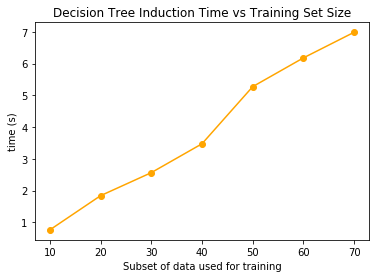

In [13]:
plt.plot([70,60,50,40,30,20,10],times,'-o', color='orange')
plt.title('Decision Tree Induction Time vs Training Set Size')
plt.xlabel('Subset of data used for training')
plt.ylabel('time (s)')
plt.show()

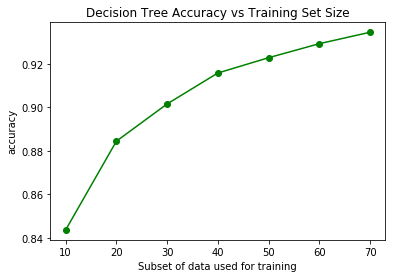

In [14]:
plt.plot([70,60,50,40,30,20,10],accuracies,'-o', color='green')
plt.title('Decision Tree Accuracy vs Training Set Size')
plt.xlabel('Subset of data used for training')
plt.ylabel('accuracy')
plt.show()

In [15]:
#computational time grows like O(n), while the accuracy grows like O(sqrtn). This means that you can save tons of computational
#time by sacrificing minimal accuracy.
#For this dataset, computational time can be cut in half by using 40% of the data as a training set. Accuracy only falls by 2%.

In [16]:
#From this experiment we can conclude that significant computational costs/time can be saved depending on the accuracy needed.
#In this experiment, using 40% of data to induce the tree is optimal as it keeps accuracy above 90% with 1/2 the cost.

In [17]:
#All computations are carried out on a machine with an Intel 17 processor with 4 cores running at 2.6GHz
#Although we have expressed time using Big O notation, it still helps to calibrate the times based on hardware used.